# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# student details 1: Polina K. 4940
# student details 2: Elad I. 9586

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Gemini
Goal: To help fix minor syntax errors, spot coding mistakes, and suggest quick corrections during implementation.
Propmpt1: Is there any changes I need to provide in my code?

Propmpt2: How can I write this row shorter?

AI agent name 2: ChatGPT
Goal: To better understand the course material, clear up difficult concepts, and get coding help.
Propmpt1: What are the steps in EDA?

Propmpt2: How does cross validation work?

Propmpt3: Could an unsupervised clustering algorithm, like K-Means, be used to identify the three wine types without using the target labels?

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

The Wine recognition dataset addresses the problem of classifying different types of wine based on chemical measurements.
It has 178 samples, each wine is described by 13 numeric attributes like alcohol, malic acid, magnesium, phenols, color intensity and more.
The target variable is the wine class (class_0, class_1, class_2), which corresponds to wines grown by three cultivators in the same region
in Italy.
The dataset has no missing values, and the classes are balanced.
The dataset used to practice multi-class classification and to test different machine learning methods.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [2]:
#Load the dataset
def load_dataset(file_train , file_test):
    df_train = pd.read_csv(file_train)
    df_test = pd.read_csv(file_test)
    return df_train,df_test

In [3]:
file_train = "wine_train.csv"
file_test = "wine_test.csv"
df_train,df_test = load_dataset(file_train , file_test)

In [4]:
#Print the first 5 rows of the training dataset
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
df_test.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
#EDA
df_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


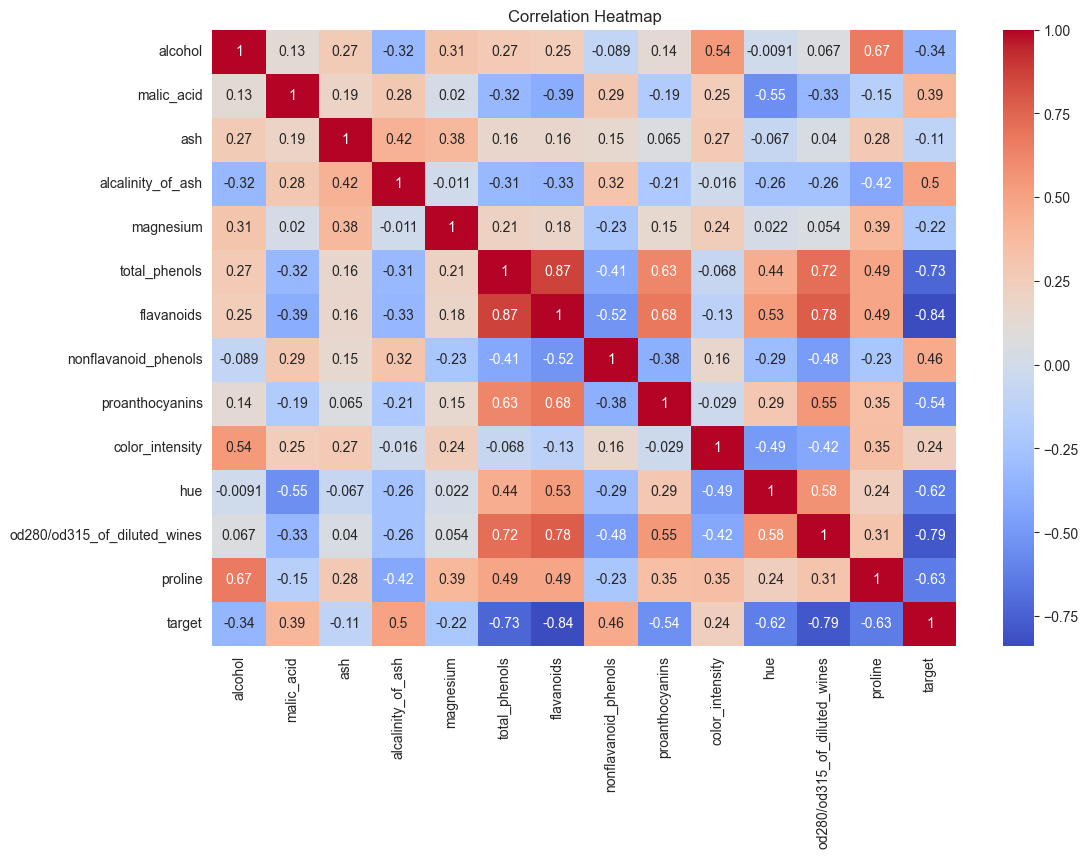

In [7]:
#Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

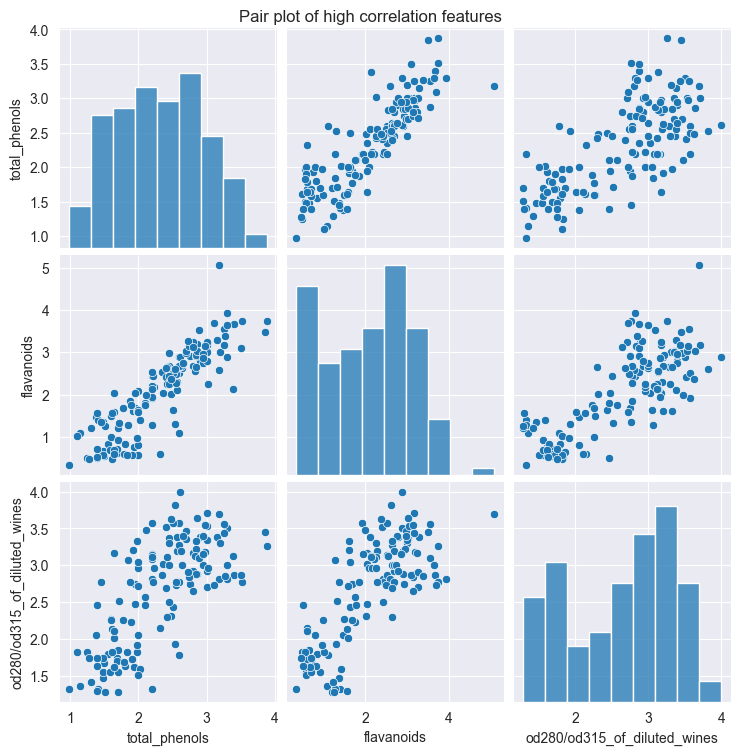

In [8]:
correlationFeatures = ['total_phenols','flavanoids', "od280/od315_of_diluted_wines"]
sns.pairplot(df_train[correlationFeatures])
plt.suptitle('Pair plot of high correlation features',y=1)
plt.show()

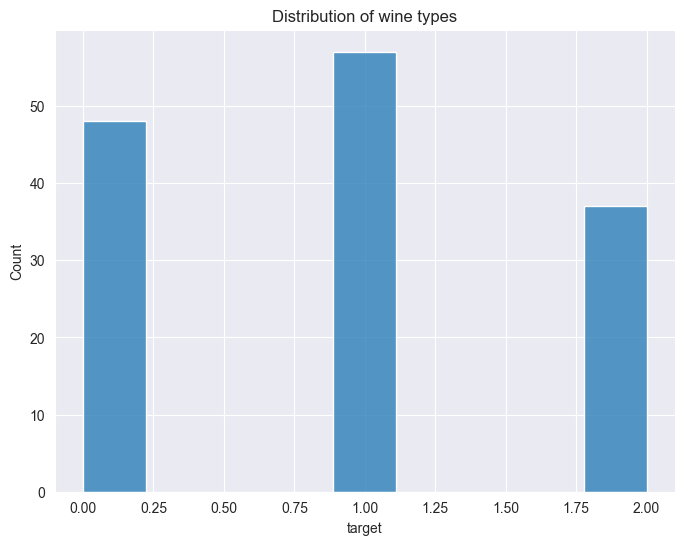

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['target'])
plt.title('Distribution of wine types')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [10]:
#Cross-validation
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

In [11]:
preprocessing_options = [
    ('minmax', MinMaxScaler()),
    ('standard', StandardScaler())
]

#PCA options: None, 2, 5, 7 components,
pca_options = [
    ('pca_none', PCA(n_components=None)),
    ('pca_2', PCA(n_components=2)),
    ('pca_5', PCA(n_components=5)),
    ('pca_7', PCA(n_components=7))
]

#Algorithms: Decision Tree, KNN, Logistic Regression
models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))
]
param_grid = {
    'decision_tree': {
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
    },
    'knn': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan', 'chebyshev']
    },
    'logistic_regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs']
    }
}

In [12]:

results = []
all_combinations = []
for preprocessing_name, preprocessing_step in preprocessing_options:
    for pca_name, pca_step in pca_options:
        for model_name, model_step in models:
            pipe = Pipeline([
                ('preprocessing', preprocessing_step),
                ('pca', pca_step),
                ('model', model_step)
            ])
            # Set up GridSearchCV
            grid_search = GridSearchCV(
                pipe,
                param_grid[model_name],
                cv=5,
                scoring=make_scorer(f1_score, average='macro'),
                n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            results.append({
                'preprocessing': preprocessing_name,
                'pca': pca_name,
                'model': model_name,
                'best_score': grid_search.best_score_,
                'best_params': grid_search.best_params_
            })
            all_combinations.extend([
                {**{'preprocessing': preprocessing_name, 'pca': pca_name, 'model': model_name}, **params, 'mean_score': score}
                for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])
            ])

# Convert to DataFrame
results_df = pd.DataFrame(results)
#Expand best_params into columns
best_params_df = results_df['best_params'].apply(pd.Series)
#Combine expanded params with the rest of the DataFrame
results_df_expanded = pd.concat([results_df.drop(columns=['best_params']), best_params_df], axis=1)
#Sort by best_score and show top 5
top_5 = results_df_expanded.sort_values(by='best_score', ascending=False).head(5)
top_5



,preprocessing,pca,model,best_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__metric,model__n_neighbors,model__weights,model__C,model__penalty,model__solver
7,minmax,pca_5,knn,0.978968,NaN,NaN,NaN,euclidean,7.0,uniform,NaN,NaN,NaN
4,minmax,pca_2,knn,0.978968,NaN,NaN,NaN,euclidean,5.0,uniform,NaN,NaN,NaN
14,standard,pca_none,logistic_regression,0.978711,NaN,NaN,NaN,NaN,NaN,NaN,0.1,l2,lbfgs
10,minmax,pca_7,knn,0.973622,NaN,NaN,NaN,manhattan,3.0,uniform,NaN,NaN,NaN
16,standard,pca_2,knn,0.972852,NaN,NaN,NaN,euclidean,5.0,uniform,NaN,NaN,NaN


In [13]:
#Show all results
all_combinations_df = pd.DataFrame(all_combinations)
all_combinations_df

,preprocessing,pca,model,model__max_depth,model__min_samples_leaf,model__min_samples_split,mean_score,model__metric,model__n_neighbors,model__weights,model__C,model__penalty,model__solver
0,minmax,pca_none,decision_tree,3.0,1.0,2.0,0.936827,NaN,NaN,NaN,NaN,NaN,NaN
1,minmax,pca_none,decision_tree,3.0,1.0,5.0,0.943399,NaN,NaN,NaN,NaN,NaN,NaN
2,minmax,pca_none,decision_tree,3.0,1.0,10.0,0.943399,NaN,NaN,NaN,NaN,NaN,NaN
3,minmax,pca_none,decision_tree,3.0,2.0,2.0,0.943399,NaN,NaN,NaN,NaN,NaN,NaN
4,minmax,pca_none,decision_tree,3.0,2.0,5.0,0.943399,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,standard,pca_7,knn,NaN,NaN,NaN,0.959187,chebyshev,7.0,distance,NaN,NaN,NaN
388,standard,pca_7,logistic_regression,NaN,NaN,NaN,0.964372,NaN,NaN,NaN,0.01,l2,lbfgs
389,standard,pca_7,logistic_regression,NaN,NaN,NaN,0.964384,NaN,NaN,NaN,0.10,l2,lbfgs
390,standard,pca_7,logistic_regression,NaN,NaN,NaN,0.964384,NaN,NaN,NaN,1.00,l2,lbfgs


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
# Get the preprocessing transformer and model object associated with the best model
best_model = results_df.loc[results_df['best_score'].idxmax()]
best_preprocessing = dict(preprocessing_options)[best_model['preprocessing']]
best_pca = dict(pca_options)[best_model['pca']]
best_model_obj = dict(models)[best_model['model']]

best_pipe = Pipeline([
    ('preprocessing', best_preprocessing),
    ('pca', best_pca),
    ('model', best_model_obj)
])

In [15]:
#Set parameters of the best pipeline based on the best_params found during GridSearchCV

best_pipe.set_params(**best_model['best_params'])

,steps,"[('preprocessing', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


In [16]:
#Fit the best pipeline on the training data
best_pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'


## Part 5 - Apply on test and show model performance estimation

In [17]:
#Predict on the test set using the entire pipeline
y_pred = best_pipe.predict(X_test)

In [18]:
#Check the predictions
print("\nPredictions on the test set:")
y_pred_df = pd.DataFrame({
    'Target': y_test,
    'Predicted': y_pred
})


Predictions on the test set:


In [19]:
#Calculate F1-macro score on the test set using predictions from the best pipeline
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1-macro score of the best model on test set: {f1:.2f}")
print(f"Best Model: {best_model_obj}")
print(f"Best Preprocessing: {best_preprocessing}")
print(f"Best PCA: {best_pca}")



F1-macro score of the best model on test set: 0.97
Best Model: KNeighborsClassifier(metric='euclidean')
Best Preprocessing: MinMaxScaler()
Best PCA: PCA(n_components=2)


In [20]:
#Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

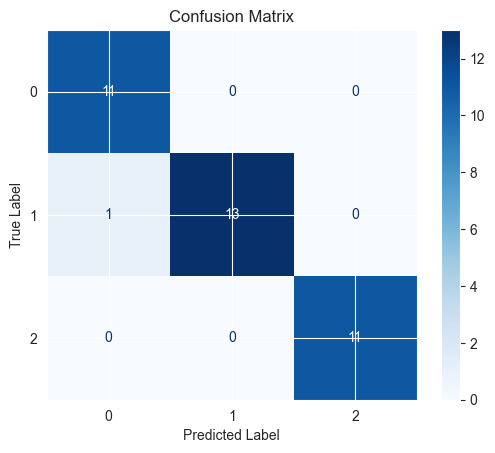

In [21]:
#Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()